# グラフ理論の基礎
### ねらい
* グラフ理論の基礎を学ぶ

### 例として、日本の都道府県の県庁所在地の緯度・経度のデータを使います。
まずはデータのダウンロードから

In [82]:
# URL によるリソースへのアクセスを提供するライブラリをインポートする。
import urllib # Python 2 の場合
# import urllib.request # Python 3 の場合

In [83]:
# ウェブ上のリソースを指定する
url = 'https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/location.txt'

In [84]:
# 指定したURLからリソースをダウンロードし、名前をつける。
urllib.urlretrieve(url, 'location.txt') # Python 2 の場合
# urllib.request.urlretrieve(url, 'location.txt') # Python 3 の場合

('location.txt', <httplib.HTTPMessage instance at 0x10f2b5368>)

In [4]:
# ダウンロードしたデータから、列ごとに数字を読み込んでリストに格納する。
col1 = [] # ０列目の数字を格納する予定のリスト
col2 = [] # １列目の数字を格納する予定のリスト
col3 = [] # ２列目の数字を格納する予定のリスト
for i, line in enumerate(open('location.txt')): # ファイルを開いて一行一行読み込む
    if i == 0: # ０番目の行の場合
        continue # 次の行に行く
    c = line.split(",") # 行を空白文字で分割したものをcというリストに入れる
    col1.append(c[0]) # ０列目の単語col1に入れる
    col2.append(float(c[1])) # １列目の単語を実数に変換してcol2に入れる
    col3.append(float(c[2])) # ２列目の単語を実数に変換してcol3に入れる

In [5]:
# 都市名のリストの中身を確認する。
print (col1)

['Sapporo', 'Aomori', 'Morioka', 'Sendai', 'Akita', 'Yamagata', 'Fukushima', 'Mito', 'Utsunomiya', 'Maebashi', 'Saitama', 'Chiba', 'Tokyo', 'Yokohama', 'Niigata', 'Toyama', 'Kanazawa', 'Fukui', 'Kofu', 'Nagano', 'Gifu', 'Shizuoka', 'Nagoya', 'Tsu', 'Otsu', 'Kyoto', 'Osaka', 'Kobe', 'Nara', 'Wakayama', 'Tottori', 'Matsue', 'Okayama', 'Hiroshima', 'Yamaguchi', 'Tokushima', 'Takamatsu', 'Matsuyama', 'Kochi', 'Fukuoka', 'Saga', 'Nagasaki', 'Kumamoto', 'Oita', 'Miyazaki', 'Kagoshima', 'Naha']


__課題：__緯度のリスト、経度のリストの中身を確認してみましょう。

### データの図示

In [8]:
# 図やグラフを図示するためのライブラリをインポートする。
import matplotlib.pyplot as plt
%matplotlib inline

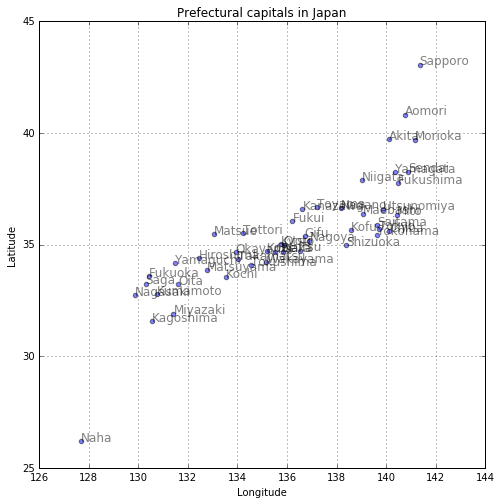

In [85]:
#都市をプロットする
plt.figure(figsize=(8, 8))
plt.scatter(col3, col2, alpha=0.5)
plt.title("Prefectural capitals in Japan")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
for city, x, y in zip(col1, col3, col2):
    plt.text(x, y, city, alpha=0.5, size=12)
plt.show()

__課題:__都市名を書かずに、点だけプロットした図を作成してみましょう。

### 都市間の距離を求める

In [11]:
# 都市間の距離を求める関数を作る。
import math
def distance(x1, y1, x2, y2):
    return math.sqrt((x1 - x2)**2 + (y1 - y2)**2)

In [12]:
# すべての都市間で都市間の距離を計算する。
dist = []
for i, city1 in enumerate(zip(col1, col3, col2)):
    for j, city2 in enumerate(zip(col1, col3, col2)):
        if i >= j:
            continue
        dist.append(distance(city1[1], city1[2], city2[1], city2[2]))

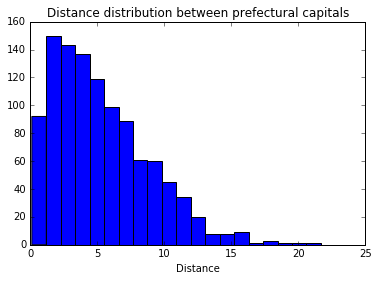

In [13]:
# 都市間距離の分布を見る
plt.hist(dist, bins=20)
plt.title("Distance distribution between prefectural capitals")
plt.xlabel("Distance")
plt.show()

### 都市間に線を引く

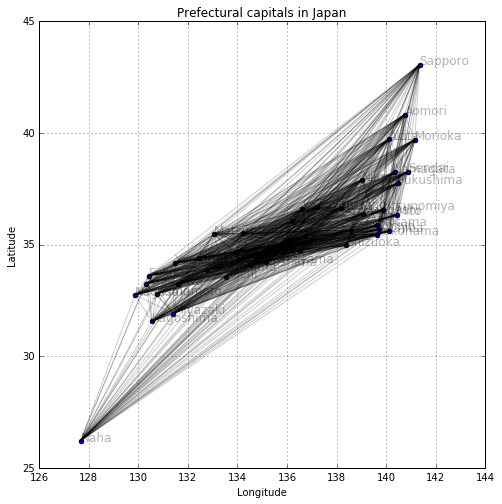

In [14]:
#すべての都市間に線を引く
plt.figure(figsize=(8, 8))
plt.title("Prefectural capitals in Japan")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
for city1, x1, y1 in zip(col1, col3, col2):
    for city2, x2, y2 in zip(col1, col3, col2):
        if city1 >= city2:
            continue
        plt.plot([x1, x2], [y1, y2], 'k-', alpha=0.2)
plt.scatter(col3, col2)
for city, x, y in zip(col1, col3, col2):
    plt.text(x, y, city, alpha=0.3, size=12)
plt.show()

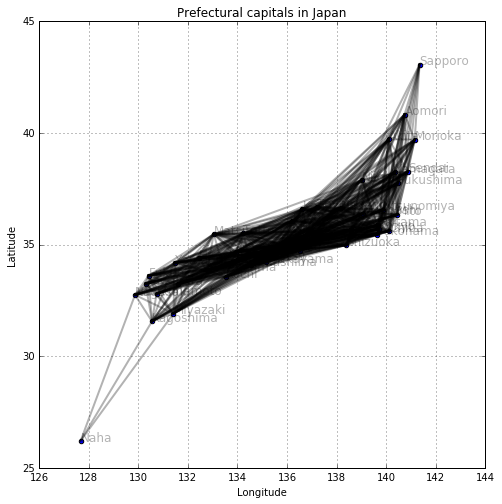

In [15]:
#水平移動距離7以下の都市間だけ線を引く
plt.figure(figsize=(8, 8))
plt.title("Prefectural capitals in Japan")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
for city1, x1, y1 in zip(col1, col3, col2):
    for city2, x2, y2 in zip(col1, col3, col2):
        if city1 >= city2:
            continue
        if distance(x1, y1, x2, y2) > 7:
            continue
        plt.plot([x1, x2], [y1, y2], 'k-', alpha=0.3, lw=2)
plt.scatter(col3, col2)
for city, x, y in zip(col1, col3, col2):
    plt.text(x, y, city, alpha=0.3, size=12)
plt.show()

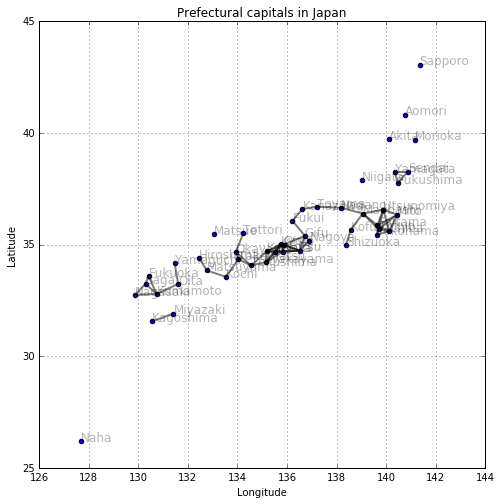

In [17]:
#水平移動距離１以下の都市間だけ線を引く
plt.figure(figsize=(8, 8))
plt.title("Prefectural capitals in Japan")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
for city1, x1, y1 in zip(col1, col3, col2):
    for city2, x2, y2 in zip(col1, col3, col2):
        if city1 >= city2:
            continue
        if distance(x1, y1, x2, y2) > 1:
            continue
        plt.plot([x1, x2], [y1, y2], 'k-', alpha=0.5, lw=2)
plt.scatter(col3, col2)
for city, x, y in zip(col1, col3, col2):
    plt.text(x, y, city, alpha=0.3, size=12)
plt.show()

__課題__: 水平移動距離2以下の都市間だけ線を引いた場合に、どのようなネットワークが描けるか確認してみましょう。


上の図で、いくつかの「__連結成分 (connected components, connected subgraphs)__」が見えている。連結成分のことを__クラスター(clusters)__と呼ぶこともある。要素が１つしか存在しないクラスターのことを__シングルトン（singleton）__と呼びます。連結成分の取り出し方について、以下で説明します。

### 連結している都市の組をすべて取り出す
ここで、「連結している都市の組」とは、「水平移動距離１以下の都市の組」を指すものとします。

In [18]:
edges = []
for i, city1 in enumerate(zip(col1, col3, col2)):
    for j, city2 in enumerate(zip(col1, col3, col2)):
        if i >= j:
            continue
        if distance(city1[1], city1[2], city2[1], city2[2]) > 1:
            continue
        edges.append((city1[0], city2[0]))

In [19]:
print (edges)

[('Sendai', 'Yamagata'), ('Sendai', 'Fukushima'), ('Yamagata', 'Fukushima'), ('Mito', 'Utsunomiya'), ('Mito', 'Saitama'), ('Mito', 'Chiba'), ('Mito', 'Tokyo'), ('Utsunomiya', 'Maebashi'), ('Utsunomiya', 'Saitama'), ('Utsunomiya', 'Chiba'), ('Utsunomiya', 'Tokyo'), ('Maebashi', 'Saitama'), ('Maebashi', 'Tokyo'), ('Maebashi', 'Kofu'), ('Maebashi', 'Nagano'), ('Saitama', 'Chiba'), ('Saitama', 'Tokyo'), ('Saitama', 'Yokohama'), ('Chiba', 'Tokyo'), ('Chiba', 'Yokohama'), ('Tokyo', 'Yokohama'), ('Toyama', 'Kanazawa'), ('Toyama', 'Nagano'), ('Kanazawa', 'Fukui'), ('Fukui', 'Gifu'), ('Kofu', 'Shizuoka'), ('Gifu', 'Nagoya'), ('Gifu', 'Tsu'), ('Gifu', 'Otsu'), ('Nagoya', 'Tsu'), ('Tsu', 'Otsu'), ('Tsu', 'Kyoto'), ('Tsu', 'Osaka'), ('Tsu', 'Nara'), ('Otsu', 'Kyoto'), ('Otsu', 'Osaka'), ('Otsu', 'Kobe'), ('Otsu', 'Nara'), ('Kyoto', 'Osaka'), ('Kyoto', 'Kobe'), ('Kyoto', 'Nara'), ('Kyoto', 'Wakayama'), ('Osaka', 'Kobe'), ('Osaka', 'Nara'), ('Osaka', 'Wakayama'), ('Kobe', 'Nara'), ('Kobe', 'Wakayama

### 自分と連結している都市のリストを格納した辞書を作成する

In [20]:
neighbor = {}
for i, city1 in enumerate(zip(col1, col3, col2)):
    for j, city2 in enumerate(zip(col1, col3, col2)):
        if i >= j:
            continue
        if distance(city1[1], city1[2], city2[1], city2[2]) > 1:
            continue
        if city1[0] not in neighbor.keys():
            neighbor.update({city1[0]:[]})
        if city2[0] not in neighbor[city1[0]]:
            neighbor[city1[0]].append(city2[0])
        if city2[0] not in neighbor.keys():
            neighbor.update({city2[0]:[]})
        if city1[0] not in neighbor[city2[0]]:
            neighbor[city2[0]].append(city1[0])

In [21]:
print (neighbor)

{'Utsunomiya': ['Mito', 'Maebashi', 'Saitama', 'Chiba', 'Tokyo'], 'Wakayama': ['Kyoto', 'Osaka', 'Kobe', 'Nara', 'Tokushima'], 'Nagasaki': ['Saga', 'Kumamoto'], 'Tokyo': ['Mito', 'Utsunomiya', 'Maebashi', 'Saitama', 'Chiba', 'Yokohama'], 'Okayama': ['Tottori', 'Tokushima', 'Takamatsu'], 'Miyazaki': ['Kagoshima'], 'Nagano': ['Maebashi', 'Toyama'], 'Toyama': ['Kanazawa', 'Nagano'], 'Maebashi': ['Utsunomiya', 'Saitama', 'Tokyo', 'Kofu', 'Nagano'], 'Nagoya': ['Gifu', 'Tsu'], 'Chiba': ['Mito', 'Utsunomiya', 'Saitama', 'Tokyo', 'Yokohama'], 'Sendai': ['Yamagata', 'Fukushima'], 'Tokushima': ['Kobe', 'Wakayama', 'Okayama', 'Takamatsu'], 'Kofu': ['Maebashi', 'Shizuoka'], 'Oita': ['Yamaguchi', 'Kumamoto'], 'Kobe': ['Otsu', 'Kyoto', 'Osaka', 'Nara', 'Wakayama', 'Tokushima'], 'Otsu': ['Gifu', 'Tsu', 'Kyoto', 'Osaka', 'Kobe', 'Nara'], 'Tsu': ['Gifu', 'Nagoya', 'Otsu', 'Kyoto', 'Osaka', 'Nara'], 'Nara': ['Tsu', 'Otsu', 'Kyoto', 'Osaka', 'Kobe', 'Wakayama'], 'Hiroshima': ['Matsuyama'], 'Matsuyama': [

### 深さ優先探索
深さ優先探索（ふかさゆうせんたんさく、英: depth-first search, DFS、バックトラック法ともいう）は、木やグラフを探索するためのアルゴリズムである。アルゴリズムは根から(グラフの場合はどのノードを根にするか決定する)始まり、バックトラックするまで可能な限り探索を行う。「縦型探索」とも呼ばれる。<img src="https://upload.wikimedia.org/wikipedia/commons/2/2c/Depthfirst.png" width="300">

In [22]:
def depth_first(neighbor, start):
    visited = []
    stack = []
    stack.append(start)
    result = []
    while len(stack) > 0:
        next_city = stack.pop()
        if next_city in visited:
            continue
        result.append(next_city)
        visited.append(next_city)
        for nei in neighbor[next_city]:
            stack.append(nei)
    return result

In [23]:
print (depth_first(neighbor, 'Tokyo'))

['Tokyo', 'Yokohama', 'Chiba', 'Saitama', 'Maebashi', 'Nagano', 'Toyama', 'Kanazawa', 'Fukui', 'Gifu', 'Otsu', 'Nara', 'Wakayama', 'Tokushima', 'Takamatsu', 'Kochi', 'Matsuyama', 'Hiroshima', 'Okayama', 'Tottori', 'Kobe', 'Osaka', 'Kyoto', 'Tsu', 'Nagoya', 'Kofu', 'Shizuoka', 'Utsunomiya', 'Mito']


得られたパス（経路）を図にしてみましょう。まずは、それを実行する関数を作成します。

In [72]:
def draw_path(all_cities, all_xs, all_ys, paths):
    city2xy = {}
    path_xs = []
    path_ys = []
    for city, x, y in zip(all_cities, all_xs, all_ys):
        city2xy.update({city:[x, y]})
    for path in paths:
        for city in path:
            path_xs.append(city2xy[city][0])
            path_ys.append(city2xy[city][1])

    plt.figure(figsize=(8, 8))
    plt.title("Prefectural capitals in Japan")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.grid(True)
    shown_cities = []
    for path in paths:
        for i in range(len(path) - 1):
            city1 = path[i]
            city2 = path[i + 1]
            x1 = city2xy[city1][0]
            y1 = city2xy[city1][1]
            x2 = city2xy[city2][0]
            y2 = city2xy[city2][1]
            plt.plot([x1, x2], [y1, y2], 'k-', alpha=0.5, lw=2)
            if city1 not in shown_cities:
                shown_cities.append(city1)
            if city2 not in shown_cities:
                shown_cities.append(city2)
    plt.scatter(path_xs, path_ys)
    for city in shown_cities:
        plt.text(city2xy[city][0], city2xy[city][1], city, alpha=0.5, size=12)
    plt.show()

図示してみます。深さ優先探索では、まず行けるところまで遠くに行ってから、引き返すような探索になることがわかります。

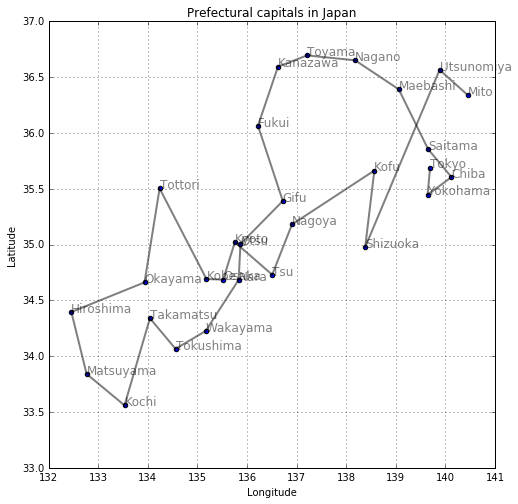

In [73]:
draw_path(col1, col3, col2, [depth_first(neighbor, 'Tokyo')])

__課題：__他の都市からスタートしたらどのような経路になるか確認してみましょう。

### 幅優先探索
幅優先探索（はばゆうせんたんさく、英: breadth first search）はグラフ理論(Graph theory)において木構造(tree structure)やグラフ(graph)の探索に用いられるアルゴリズム。アルゴリズムは根ノードで始まり隣接した全てのノードを探索する。それからこれらの最も近いノードのそれぞれに対して同様のことを繰り返して探索対象ノードをみつける。「横型探索」とも言われる。深さ優先探索と、幅優先探索の探索順序の違いは下図の通り。
<img src="http://www.unfindable.net/images/search/dfs-bfs.png">

In [24]:
from collections import deque
def width_first(neighbor, start):
    visited = []
    queue = deque([])
    queue.append(start)
    result = []
    while len(queue) > 0:
        next_city = queue.popleft()
        if next_city in visited:
            continue
        result.append (next_city)
        visited.append(next_city)
        for nei in neighbor[next_city]:
            queue.append(nei)
    return result

In [74]:
print (width_first(neighbor, 'Tokyo'))

['Tokyo', 'Mito', 'Utsunomiya', 'Maebashi', 'Saitama', 'Chiba', 'Yokohama', 'Kofu', 'Nagano', 'Shizuoka', 'Toyama', 'Kanazawa', 'Fukui', 'Gifu', 'Nagoya', 'Tsu', 'Otsu', 'Kyoto', 'Osaka', 'Nara', 'Kobe', 'Wakayama', 'Tokushima', 'Okayama', 'Takamatsu', 'Tottori', 'Kochi', 'Matsuyama', 'Hiroshima']


得られたパス（経路）を図にしてみましょう。幅優先探索では、近い場所から行くような探索になることがわかります。

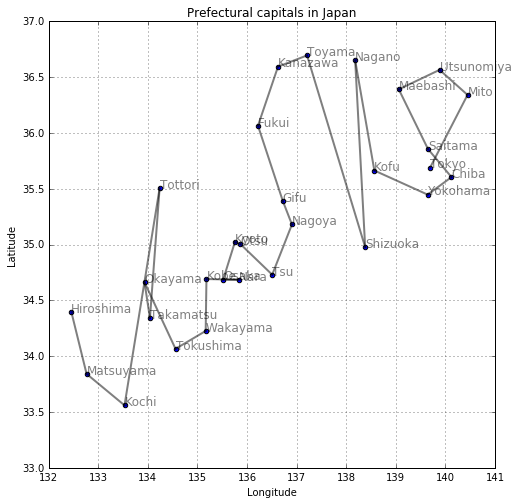

In [76]:
draw_path(col1, col3, col2, [width_first(neighbor, 'Tokyo')])

__課題：__他の都市からスタートしたらどのような経路になるか確認してみましょう。

### 連結成分 (Connected components)
連結成分は、深さ優先探索、幅優先探索のどちらを使っても求められる。

In [26]:
def connected_components(neighbor):
    visited = []
    result = []
    for city in neighbor.keys():
        if city in visited:
            continue
        component = depth_first(neighbor, city)
        # component = width_first(neighbor, city) でも良い
        result.append(component)
        for city2 in component:
            visited.append(city2)
    return result

In [28]:
for component in connected_components(neighbor):
    print (component)

['Utsunomiya', 'Tokyo', 'Yokohama', 'Chiba', 'Saitama', 'Maebashi', 'Nagano', 'Toyama', 'Kanazawa', 'Fukui', 'Gifu', 'Otsu', 'Nara', 'Wakayama', 'Tokushima', 'Takamatsu', 'Kochi', 'Matsuyama', 'Hiroshima', 'Okayama', 'Tottori', 'Kobe', 'Osaka', 'Kyoto', 'Tsu', 'Nagoya', 'Kofu', 'Shizuoka', 'Mito']
['Nagasaki', 'Kumamoto', 'Oita', 'Yamaguchi', 'Saga', 'Fukuoka']
['Miyazaki', 'Kagoshima']
['Sendai', 'Fukushima', 'Yamagata']


### 近い都市を求めて彷徨い歩く
再び、下の地図を見てください。この地図をもとに、「同じ都市は二度と訪問しない」という条件で、近い都市を求めて彷徨い歩いてみましょう。東京から出発して彷徨い歩いたら、どこにたどり着けるでしょうか？

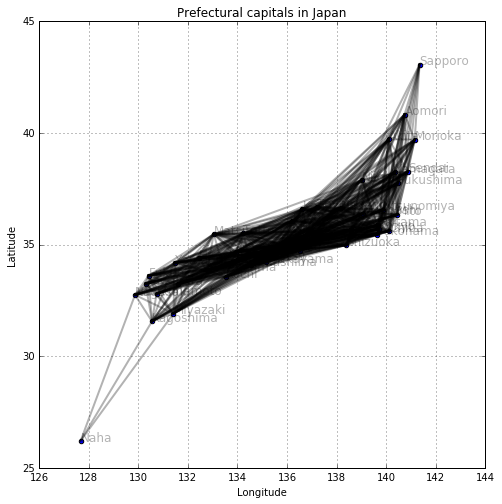

In [29]:
#水平移動距離7以下の都市間だけ線を引く
plt.figure(figsize=(8, 8))
plt.title("Prefectural capitals in Japan")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
for city1, x1, y1 in zip(col1, col3, col2):
    for city2, x2, y2 in zip(col1, col3, col2):
        if city1 >= city2:
            continue
        if distance(x1, y1, x2, y2) > 7:
            continue
        plt.plot([x1, x2], [y1, y2], 'k-', alpha=0.3, lw=2)
plt.scatter(col3, col2)
for city, x, y in zip(col1, col3, col2):
    plt.text(x, y, city, alpha=0.3, size=12)
plt.show()

隣接リストに距離の情報を入れて作り直します。

In [77]:
neighbor2 = {}
for i, city1 in enumerate(zip(col1, col3, col2)):
    for j, city2 in enumerate(zip(col1, col3, col2)):
        if i >= j:
            continue
        dist = distance(city1[1], city1[2], city2[1], city2[2])
        if dist > 2:
            continue
        if city1[0] not in neighbor2.keys():
            neighbor2.update({city1[0]:[]})
        if city2[0] not in neighbor2[city1[0]]:
            neighbor2[city1[0]].append([dist, city2[0]])
        if city2[0] not in neighbor2.keys():
            neighbor2.update({city2[0]:[]})
        if city1[0] not in neighbor2[city2[0]]:
            neighbor2[city2[0]].append([dist, city1[0]])

In [78]:
# 東京に隣接している都市とその距離
print (neighbor2['Tokyo'])

[[0.9975288479537999, 'Mito'], [0.897162413222939, 'Utsunomiya'], [0.9435570435855863, 'Maebashi'], [0.1728767722974974, 'Saitama'], [0.4398952534411103, 'Chiba'], [0.24661152548085752, 'Yokohama'], [1.123630525617725, 'Kofu'], [1.7908487697457867, 'Nagano'], [1.4900054973388404, 'Shizuoka']]


In [32]:
# 東京に隣接している都市とその距離を、近い順に並べる
print (sorted(neighbor2['Tokyo']))

[[0.1728767722974974, 'Saitama'], [0.24661152548085752, 'Yokohama'], [0.4398952534411103, 'Chiba'], [0.897162413222939, 'Utsunomiya'], [0.9435570435855863, 'Maebashi'], [0.9975288479537999, 'Mito'], [1.123630525617725, 'Kofu'], [1.4900054973388404, 'Shizuoka'], [1.7908487697457867, 'Nagano']]


彷徨い歩くときは、深さ優先探索的な考え方を使います。

In [79]:
def wander(neighbor2, start):
    visited = []
    curr = start
    result = []
    while True:
        result.append(curr)
        visited.append(curr)
        count = 0
        for dist, next_city in sorted(neighbor2[curr]):
            if next_city in visited:
                count += 1
            else:
                curr = next_city
                break
        if count == len(neighbor2[curr]):
            break
    return result

In [80]:
print (wander(neighbor2, "Tokyo"))

['Tokyo', 'Saitama', 'Yokohama', 'Chiba', 'Mito', 'Utsunomiya', 'Maebashi', 'Kofu', 'Shizuoka', 'Nagoya', 'Gifu', 'Tsu', 'Nara', 'Osaka', 'Kobe', 'Wakayama', 'Tokushima', 'Takamatsu', 'Okayama', 'Tottori', 'Matsue', 'Hiroshima', 'Matsuyama', 'Kochi', 'Oita', 'Yamaguchi', 'Fukuoka', 'Saga', 'Kumamoto', 'Nagasaki', 'Kagoshima', 'Miyazaki']


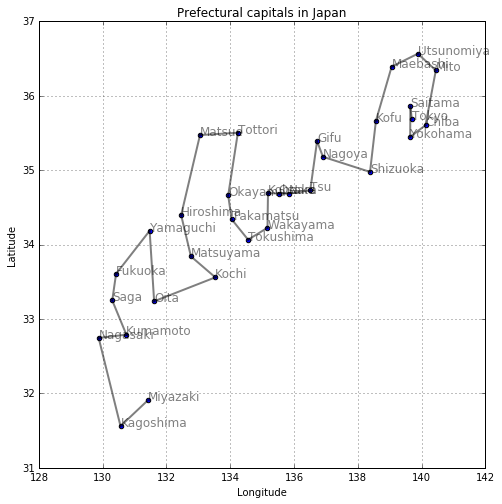

In [81]:
draw_path(col1, col3, col2, [wander(neighbor2, "Tokyo")])

__課題：__他の都市からスタートしたらどのような経路になるか確認してみましょう。